# About Dataset

Meal delievry company has multiple fulfillment centers in various cities, where they need to deliver food to their customers. 
This analysis helps clients to forecaste demand for upcoming weeks to plan raw materials accordingly. 
Dataset has been choosen from Kaggle. 

In [1]:
import pandas as pd
pd.set_option('display.max_columns', 300)
pd.set_option('display.max_rows',300)

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
test_df = pd.read_csv("/Users/trimpu/Documents/Meal_Forecast/test.csv")
test_df
#, sep=",",header=None

,id,week,center_id,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured
0,1028232,146,55,1885,158.11,159.11,0,0
1,1127204,146,55,1993,160.11,159.11,0,0
2,1212707,146,55,2539,157.14,159.14,0,0
3,1082698,146,55,2631,162.02,162.02,0,0
4,1400926,146,55,1248,163.93,163.93,0,0
...,...,...,...,...,...,...,...,...
32568,1250239,155,61,1543,482.09,484.09,0,0
32569,1039516,155,61,2304,483.09,483.09,0,0
32570,1158107,155,61,2664,322.07,323.07,0,0
32571,1444235,155,61,2569,322.07,323.07,0,0


In [3]:
fullcenter_df = pd.read_csv("/Users/trimpu/Documents/Meal_Forecast/fulfilment_center_info.csv", sep=",")
fullcenter_df.head()

,center_id,city_code,region_code,center_type,op_area
0,11,679,56,TYPE_A,3.7
1,13,590,56,TYPE_B,6.7
2,124,590,56,TYPE_C,4.0
3,66,648,34,TYPE_A,4.1
4,94,632,34,TYPE_C,3.6


In [4]:
samplesub_df = pd.read_csv("/Users/trimpu/Documents/Meal_Forecast/sample_submission.csv", sep=",",header=None)
samplesub_df

,0,1
0,id,num_orders
1,1028232,0
2,1127204,0
3,1212707,0
4,1082698,0
...,...,...
32569,1250239,0
32570,1039516,0
32571,1158107,0
32572,1444235,0


In [5]:
mealinfo_df = pd.read_csv("/Users/trimpu/Documents/Meal_Forecast/meal_info.csv", sep=",")
mealinfo_df.head()

,meal_id,category,cuisine
0,1885,Beverages,Thai
1,1993,Beverages,Thai
2,2539,Beverages,Thai
3,1248,Beverages,Indian
4,2631,Beverages,Indian


In [6]:
mealinfo_df['cuisine'].unique()
# Thai', 'Indian', 'Italian', 'Continental -4 cuisines

mealinfo_df['category'].unique()
# Beverages', 'Extras', 'Soup', 'Other Snacks', 'Salad',
       #'Rice Bowl', 'Starters', 'Sandwich', 'Pasta', 'Desert', 'Biryani', 'Pizza', 'Fish', 'Seafood'  - 14 categories

array(['Beverages', 'Extras', 'Soup', 'Other Snacks', 'Salad',
       'Rice Bowl', 'Starters', 'Sandwich', 'Pasta', 'Desert', 'Biryani',
       'Pizza', 'Fish', 'Seafood'], dtype=object)

In [7]:
train_df = pd.read_csv("/Users/trimpu/Documents/Meal_Forecast/train.csv", sep=",")
train_df

,id,week,center_id,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured,num_orders
0,1379560,1,55,1885,136.83,152.29,0,0,177
1,1466964,1,55,1993,136.83,135.83,0,0,270
2,1346989,1,55,2539,134.86,135.86,0,0,189
3,1338232,1,55,2139,339.50,437.53,0,0,54
4,1448490,1,55,2631,243.50,242.50,0,0,40
...,...,...,...,...,...,...,...,...,...
456543,1271326,145,61,1543,484.09,484.09,0,0,68
456544,1062036,145,61,2304,482.09,482.09,0,0,42
456545,1110849,145,61,2664,237.68,321.07,0,0,501
456546,1147725,145,61,2569,243.50,313.34,0,0,729


In [8]:
train_df.isnull().sum()

train_df.info()

train_df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 456548 entries, 0 to 456547
Data columns (total 9 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   id                     456548 non-null  int64  
 1   week                   456548 non-null  int64  
 2   center_id              456548 non-null  int64  
 3   meal_id                456548 non-null  int64  
 4   checkout_price         456548 non-null  float64
 5   base_price             456548 non-null  float64
 6   emailer_for_promotion  456548 non-null  int64  
 7   homepage_featured      456548 non-null  int64  
 8   num_orders             456548 non-null  int64  
dtypes: float64(2), int64(7)
memory usage: 31.3 MB


,id,week,center_id,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured,num_orders
count,4.565480e+05,456548.000000,456548.000000,456548.000000,456548.000000,456548.000000,456548.000000,456548.00000,456548.000000
mean,1.250096e+06,74.768771,82.105796,2024.337458,332.238933,354.156627,0.081152,0.10920,261.872760
std,1.443548e+05,41.524956,45.975046,547.420920,152.939723,160.715914,0.273069,0.31189,395.922798
min,1.000000e+06,1.000000,10.000000,1062.000000,2.970000,55.350000,0.000000,0.00000,13.000000
25%,1.124999e+06,39.000000,43.000000,1558.000000,228.950000,243.500000,0.000000,0.00000,54.000000
50%,1.250184e+06,76.000000,76.000000,1993.000000,296.820000,310.460000,0.000000,0.00000,136.000000
75%,1.375140e+06,111.000000,110.000000,2539.000000,445.230000,458.870000,0.000000,0.00000,324.000000
max,1.499999e+06,145.000000,186.000000,2956.000000,866.270000,866.270000,1.000000,1.00000,24299.000000


In [9]:
train_df.head()

,id,week,center_id,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured,num_orders
0,1379560,1,55,1885,136.83,152.29,0,0,177
1,1466964,1,55,1993,136.83,135.83,0,0,270
2,1346989,1,55,2539,134.86,135.86,0,0,189
3,1338232,1,55,2139,339.50,437.53,0,0,54
4,1448490,1,55,2631,243.50,242.50,0,0,40


In [10]:
test_df.head()

,id,week,center_id,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured
0,1028232,146,55,1885,158.11,159.11,0,0
1,1127204,146,55,1993,160.11,159.11,0,0
2,1212707,146,55,2539,157.14,159.14,0,0
3,1082698,146,55,2631,162.02,162.02,0,0
4,1400926,146,55,1248,163.93,163.93,0,0


In [11]:
#Adding new column to test_df with a random number, so that train and test can be merged. 
test_df["num_orders"] = 12345

In [12]:
#concat retuns outer join where all the records in both the tables are returned. 
total_data_df = pd.concat([train_df, test_df], axis=0)
total_data_df.head()

,id,week,center_id,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured,num_orders
0,1379560,1,55,1885,136.83,152.29,0,0,177
1,1466964,1,55,1993,136.83,135.83,0,0,270
2,1346989,1,55,2539,134.86,135.86,0,0,189
3,1338232,1,55,2139,339.50,437.53,0,0,54
4,1448490,1,55,2631,243.50,242.50,0,0,40


In [13]:
mealinfo_df

,meal_id,category,cuisine
0,1885,Beverages,Thai
1,1993,Beverages,Thai
2,2539,Beverages,Thai
3,1248,Beverages,Indian
4,2631,Beverages,Indian
5,1311,Extras,Thai
6,1062,Beverages,Italian
7,1778,Beverages,Italian
8,1803,Extras,Thai
9,1198,Extras,Thai


In [14]:
total_data_df = total_data_df .merge(mealinfo_df, on="meal_id", how= "left")
total_data_df.head(5)

,id,week,center_id,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured,num_orders,category,cuisine
0,1379560,1,55,1885,136.83,152.29,0,0,177,Beverages,Thai
1,1466964,1,55,1993,136.83,135.83,0,0,270,Beverages,Thai
2,1346989,1,55,2539,134.86,135.86,0,0,189,Beverages,Thai
3,1338232,1,55,2139,339.50,437.53,0,0,54,Beverages,Indian
4,1448490,1,55,2631,243.50,242.50,0,0,40,Beverages,Indian


In [15]:
fullcenter_df.head()

,center_id,city_code,region_code,center_type,op_area
0,11,679,56,TYPE_A,3.7
1,13,590,56,TYPE_B,6.7
2,124,590,56,TYPE_C,4.0
3,66,648,34,TYPE_A,4.1
4,94,632,34,TYPE_C,3.6


In [16]:
total_data_df = total_data_df .merge(fullcenter_df, on="center_id", how= "left")
total_data_df

,id,week,center_id,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured,num_orders,category,cuisine,city_code,region_code,center_type,op_area
0,1379560,1,55,1885,136.83,152.29,0,0,177,Beverages,Thai,647,56,TYPE_C,2.0
1,1466964,1,55,1993,136.83,135.83,0,0,270,Beverages,Thai,647,56,TYPE_C,2.0
2,1346989,1,55,2539,134.86,135.86,0,0,189,Beverages,Thai,647,56,TYPE_C,2.0
3,1338232,1,55,2139,339.50,437.53,0,0,54,Beverages,Indian,647,56,TYPE_C,2.0
4,1448490,1,55,2631,243.50,242.50,0,0,40,Beverages,Indian,647,56,TYPE_C,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
489116,1250239,155,61,1543,482.09,484.09,0,0,12345,Desert,Indian,473,77,TYPE_A,4.5
489117,1039516,155,61,2304,483.09,483.09,0,0,12345,Desert,Indian,473,77,TYPE_A,4.5
489118,1158107,155,61,2664,322.07,323.07,0,0,12345,Salad,Italian,473,77,TYPE_A,4.5
489119,1444235,155,61,2569,322.07,323.07,0,0,12345,Salad,Italian,473,77,TYPE_A,4.5


In [17]:
#total_data_df.drop(['category_y', 'cuisine_y', 'category_x', 'cuisine_x','city_code_y', 'region_code_y','center_type_y', 'op_area_y'], axis = 1)
total_data_df

,id,week,center_id,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured,num_orders,category,cuisine,city_code,region_code,center_type,op_area
0,1379560,1,55,1885,136.83,152.29,0,0,177,Beverages,Thai,647,56,TYPE_C,2.0
1,1466964,1,55,1993,136.83,135.83,0,0,270,Beverages,Thai,647,56,TYPE_C,2.0
2,1346989,1,55,2539,134.86,135.86,0,0,189,Beverages,Thai,647,56,TYPE_C,2.0
3,1338232,1,55,2139,339.50,437.53,0,0,54,Beverages,Indian,647,56,TYPE_C,2.0
4,1448490,1,55,2631,243.50,242.50,0,0,40,Beverages,Indian,647,56,TYPE_C,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
489116,1250239,155,61,1543,482.09,484.09,0,0,12345,Desert,Indian,473,77,TYPE_A,4.5
489117,1039516,155,61,2304,483.09,483.09,0,0,12345,Desert,Indian,473,77,TYPE_A,4.5
489118,1158107,155,61,2664,322.07,323.07,0,0,12345,Salad,Italian,473,77,TYPE_A,4.5
489119,1444235,155,61,2569,322.07,323.07,0,0,12345,Salad,Italian,473,77,TYPE_A,4.5


In [18]:
total_data_df.isnull().sum()

id                       0
week                     0
center_id                0
meal_id                  0
checkout_price           0
base_price               0
emailer_for_promotion    0
homepage_featured        0
num_orders               0
category                 0
cuisine                  0
city_code                0
region_code              0
center_type              0
op_area                  0
dtype: int64

In [19]:
total_data_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 489121 entries, 0 to 489120
Data columns (total 15 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   id                     489121 non-null  int64  
 1   week                   489121 non-null  int64  
 2   center_id              489121 non-null  int64  
 3   meal_id                489121 non-null  int64  
 4   checkout_price         489121 non-null  float64
 5   base_price             489121 non-null  float64
 6   emailer_for_promotion  489121 non-null  int64  
 7   homepage_featured      489121 non-null  int64  
 8   num_orders             489121 non-null  int64  
 9   category               489121 non-null  object 
 10  cuisine                489121 non-null  object 
 11  city_code              489121 non-null  int64  
 12  region_code            489121 non-null  int64  
 13  center_type            489121 non-null  object 
 14  op_area                489121 non-nu

In [20]:
total_data_df["emailer_for_promotion"].value_counts()

0    449907
1     39214
Name: emailer_for_promotion, dtype: int64

In [21]:
total_data_df["homepage_featured"].value_counts()

0    436616
1     52505
Name: homepage_featured, dtype: int64

In [22]:
#Calculated discount amount
total_data_df["discount_amount"] = total_data_df["base_price"] - total_data_df["checkout_price"]

In [23]:
#Removed redundant features
#total_data_df = total_data_df.drop(["checkout_price", "base_price"], axis=1)

In [24]:
total_data_df

,id,week,center_id,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured,num_orders,category,cuisine,city_code,region_code,center_type,op_area,discount_amount
0,1379560,1,55,1885,136.83,152.29,0,0,177,Beverages,Thai,647,56,TYPE_C,2.0,15.46
1,1466964,1,55,1993,136.83,135.83,0,0,270,Beverages,Thai,647,56,TYPE_C,2.0,-1.00
2,1346989,1,55,2539,134.86,135.86,0,0,189,Beverages,Thai,647,56,TYPE_C,2.0,1.00
3,1338232,1,55,2139,339.50,437.53,0,0,54,Beverages,Indian,647,56,TYPE_C,2.0,98.03
4,1448490,1,55,2631,243.50,242.50,0,0,40,Beverages,Indian,647,56,TYPE_C,2.0,-1.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
489116,1250239,155,61,1543,482.09,484.09,0,0,12345,Desert,Indian,473,77,TYPE_A,4.5,2.00
489117,1039516,155,61,2304,483.09,483.09,0,0,12345,Desert,Indian,473,77,TYPE_A,4.5,0.00
489118,1158107,155,61,2664,322.07,323.07,0,0,12345,Salad,Italian,473,77,TYPE_A,4.5,1.00
489119,1444235,155,61,2569,322.07,323.07,0,0,12345,Salad,Italian,473,77,TYPE_A,4.5,1.00


In [25]:
#deleted negative discount_amount records
total_data_df2= total_data_df[total_data_df.discount_amount>=0.00]
total_data_df2      
    

,id,week,center_id,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured,num_orders,category,cuisine,city_code,region_code,center_type,op_area,discount_amount
0,1379560,1,55,1885,136.83,152.29,0,0,177,Beverages,Thai,647,56,TYPE_C,2.0,15.46
2,1346989,1,55,2539,134.86,135.86,0,0,189,Beverages,Thai,647,56,TYPE_C,2.0,1.00
3,1338232,1,55,2139,339.50,437.53,0,0,54,Beverages,Indian,647,56,TYPE_C,2.0,98.03
5,1270037,1,55,1248,251.23,252.23,0,0,28,Beverages,Indian,647,56,TYPE_C,2.0,1.00
6,1191377,1,55,1778,183.36,184.36,0,0,190,Beverages,Italian,647,56,TYPE_C,2.0,1.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
489116,1250239,155,61,1543,482.09,484.09,0,0,12345,Desert,Indian,473,77,TYPE_A,4.5,2.00
489117,1039516,155,61,2304,483.09,483.09,0,0,12345,Desert,Indian,473,77,TYPE_A,4.5,0.00
489118,1158107,155,61,2664,322.07,323.07,0,0,12345,Salad,Italian,473,77,TYPE_A,4.5,1.00
489119,1444235,155,61,2569,322.07,323.07,0,0,12345,Salad,Italian,473,77,TYPE_A,4.5,1.00


In [26]:
total_data_df2.var()

<ipython-input-26-d91f32d52855>:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  total_data_df2.var()


id                       2.083233e+10
week                     1.966995e+03
center_id                2.114734e+03
meal_id                  3.026393e+05
checkout_price           2.291038e+04
base_price               2.604277e+04
emailer_for_promotion    9.388907e-02
homepage_featured        1.079247e-01
num_orders               9.014754e+06
city_code                4.378957e+03
region_code              3.102026e+02
op_area                  1.199338e+00
discount_amount          2.835466e+03
dtype: float64

In [27]:
total_data_df2.describe()

,id,week,center_id,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured,num_orders,city_code,region_code,op_area,discount_amount
count,3.640830e+05,364083.000000,364083.000000,364083.000000,364083.000000,364083.000000,364083.000000,364083.000000,364083.000000,364083.000000,364083.000000,364083.000000,364083.000000
mean,1.249891e+06,79.406817,81.957782,2018.983141,328.139622,357.566118,0.104891,0.123071,1057.515003,601.651113,56.655048,4.080496,29.426496
std,1.443341e+05,44.350812,45.986234,550.126660,151.361746,161.377718,0.306413,0.328519,3002.458016,66.173685,17.612569,1.095143,53.249097
min,1.000001e+06,1.000000,10.000000,1062.000000,2.970000,55.350000,0.000000,0.000000,13.000000,456.000000,23.000000,0.900000,0.000000
25%,1.124816e+06,41.000000,43.000000,1543.000000,218.280000,243.530000,0.000000,0.000000,55.000000,556.000000,34.000000,3.600000,0.000000
50%,1.249940e+06,80.000000,76.000000,1971.000000,292.030000,314.280000,0.000000,0.000000,162.000000,599.000000,56.000000,4.000000,1.000000
75%,1.374778e+06,118.000000,110.000000,2539.000000,437.500000,466.630000,0.000000,0.000000,405.000000,651.000000,77.000000,4.500000,43.650000
max,1.499999e+06,155.000000,186.000000,2956.000000,866.270000,1112.620000,1.000000,1.000000,24299.000000,713.000000,93.000000,7.000000,820.590000


In [ ]:
total_data_df2_out = total_data_df2[~((total_data_df2 <(Q1 - 1.5 * IQR))| (total_data_df2> (Q3 + 1.5 * IQR))).any(axis=1)]
total_data_df2_out

In [29]:
from collections import Counter
counts = Counter(total_data_df2['cuisine'])
counts.most_common(10)

[('Italian', 97589),
 ('Thai', 92594),
 ('Indian', 90646),
 ('Continental', 83254)]

In [30]:
from collections import Counter
counts = Counter(total_data_df2['category'])
counts.most_common(10)

[('Beverages', 99911),
 ('Pizza', 28027),
 ('Rice Bowl', 26885),
 ('Sandwich', 26163),
 ('Other Snacks', 24310),
 ('Desert', 23800),
 ('Pasta', 23126),
 ('Starters', 22184),
 ('Salad', 21898),
 ('Seafood', 21827)]

<AxesSubplot:>

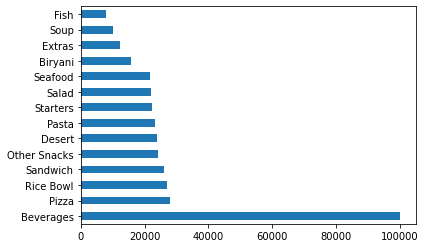

In [31]:
#category total values represented in horizontal bar plot
cat_values = total_data_df2['category'].value_counts()
cat_values.plot(kind='barh', rot=0)

In [32]:
mean_rating = total_data_df2.pivot_table('num_orders','category', aggfunc='mean')
mean_rating

,num_orders
category,
Beverages,1073.728298
Biryani,800.270738
Desert,881.917731
Extras,1136.904239
Fish,1461.334750
Other Snacks,963.246113
Pasta,839.113898
Pizza,957.586613
Rice Bowl,1426.538181


In [33]:
#total_data_df2.shape()
#total_data_df2_out.shape()

In [34]:
total_data_df2.dtypes

id                         int64
week                       int64
center_id                  int64
meal_id                    int64
checkout_price           float64
base_price               float64
emailer_for_promotion      int64
homepage_featured          int64
num_orders                 int64
category                  object
cuisine                   object
city_code                  int64
region_code                int64
center_type               object
op_area                  float64
discount_amount          float64
dtype: object

In [35]:
#Estimated food for each fulfillment_center with center_id
cat_count_by_center_id = total_data_df2.groupby(['center_id','category']).agg(cat_count = ('category', 'count'))
cat_count_by_center_id

cat_count
center_id category            
10        Beverages       1381
          Biryani          300
          Desert           341
          Extras           364
          Fish             167
...                        ...
186       Rice Bowl        345
          Salad            285
          Sandwich         337
          Seafood          270
          Starters         243

[984 rows x 1 columns]

In [36]:
#grouped category by total size
grouped_category= total_data_df2.groupby('category').size()
grouped_category

category
Beverages       99911
Biryani         15720
Desert          23800
Extras          12291
Fish             8000
Other Snacks    24310
Pasta           23126
Pizza           28027
Rice Bowl       26885
Salad           21898
Sandwich        26163
Seafood         21827
Soup             9941
Starters        22184
dtype: int64

Text(0.5, 1.0, 'category_with_centerid')

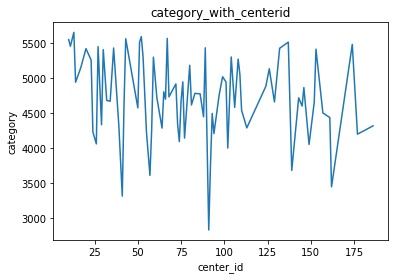

In [37]:
total_data_df2.groupby(['center_id'])['category'].count().plot(xlabel='center_id', ylabel='category')
#plt.xlabel('center_id')
#plt.ylabel('category')

plt.title('category_with_centerid')

In [38]:
grouped_cuisine = total_data_df2.groupby('cuisine').agg({'discount_amount': ['mean', 'min', 'max']})
grouped_cuisine 

discount_amount             
                       mean  min     max
cuisine                                 
Continental       53.497792  0.0  561.60
Indian            30.515290  0.0  510.19
Italian           21.256949  0.0  820.59
Thai              15.327650  0.0  259.96

In [39]:
grouped_category = total_data_df2.groupby('category').agg({'discount_amount': ['mean', 'min', 'max']})
grouped_category

discount_amount             
                        mean  min     max
category                                 
Beverages          18.838905  0.0  341.50
Biryani            15.028438  0.0  386.03
Desert             38.660728  0.0  510.19
Extras             38.298005  0.0  259.96
Fish               23.573023  0.0  291.00
Other Snacks       20.531123  0.0  144.56
Pasta              41.852725  0.0  820.59
Pizza              71.593733  0.0  294.94
Rice Bowl          29.273144  0.0  279.33
Salad              13.385743  0.0  172.60
Sandwich           21.815596  0.0  207.58
Seafood            72.454073  0.0  561.60
Soup               11.625286  0.0   78.63
Starters            8.759808  0.0  161.08

In [40]:
center_id_grouped = total_data_df2.groupby('center_id').agg({'discount_amount': ['mean', 'min', 'max']})
center_id_grouped 

discount_amount             
                     mean  min     max
center_id                             
10              28.013911  0.0  270.66
11              28.828805  0.0  246.44
13              27.647797  0.0  341.50
14              31.578126  0.0  291.00
17              30.716803  0.0  283.24
20              29.851507  0.0  293.00
23              32.328781  0.0  263.90
24              28.412327  0.0  251.23
26              29.362469  0.0  283.30
27              31.544895  0.0  286.15
29              28.404083  0.0  320.10
30              33.052306  0.0  293.00
32              27.420746  0.0  321.10
34              27.271833  0.0  374.42
36              29.461727  0.0  293.00
39              26.872251  0.0  309.40
41              29.624251  0.0  253.20
42              29.364137  0.0  820.59
43              28.379299  0.0  261.90
50              27.294825  0.0  320.10
51              30.875380  0.0  291.00
52              28.452926  0.0  260.90
53              30.832401  0.0  338.53
55              33.530987  0.0  246.44
57              30.544992  0.0  320.10
58              30.293057  0.0  320.10
59              30.224287  0.0  293.00
61              27.939256  0.0  320.10
64              27.947102  0.0  397.64
65              27.366681  0.0  320.10
66              27.501898  0.0  357.93
67              28.662819  0.0  248.35
68              26.790843  0.0  321.10
72              34.427767  0.0  255.17
73              27.800772  0.0  321.10
74              28.821625  0.0  321.10
75              26.625711  0.0  309.43
76              31.243760  0.0  291.00
77              29.602446  0.0  320.10
80              32.404334  0.0  256.11
81              27.011116  0.0  321.10
83              27.859147  0.0  294.94
86              29.971918  0.0  310.40
88              29.036649  0.0  321.10
89              31.579996  0.0  294.94
91              33.995596  0.0  254.14
92              28.339638  0.0  544.20
93              27.194201  0.0  320.10
94              28.364093  0.0  373.45
97              26.353879  0.0  305.49
99              31.529542  0.0  256.14
101             31.247334  0.0  259.96
102             31.124894  0.0  561.60
104             29.624714  0.0  277.48
106             31.383735  0.0  336.59
108             30.815745  0.0  250.29
109             29.616154  0.0  255.14
110             28.119449  0.0  321.10
113             29.270434  0.0  321.10
124             32.975014  0.0  246.44
126             30.384370  0.0  290.03
129             28.243700  0.0  322.10
132             30.417477  0.0  249.32
137             29.010301  0.0  262.90
139             29.548166  0.0  320.10
143             27.319979  0.0  320.10
145             28.038831  0.0  321.10
146             26.375348  0.0  281.30
149             30.558588  0.0  322.10
152             28.173717  0.0  291.00
153             29.833663  0.0  289.03
157             28.946137  0.0  298.76
161             29.526684  0.0  510.19
162             25.665417  0.0  386.03
174             31.024983  0.0  252.20
177             29.729140  0.0  328.83
186             28.301999  0.0  320.10

In [41]:
center_type_group = total_data_df2.groupby('center_type').agg({'discount_amount': ['mean', 'min', 'max']})
center_type_group

discount_amount             
                       mean  min     max
center_type                             
TYPE_A            29.472816  0.0  561.60
TYPE_B            28.215090  0.0  820.59
TYPE_C            30.436228  0.0  544.20

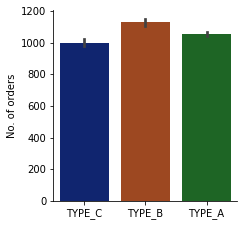

In [44]:
g = sns.catplot(
    data=total_data_df2, kind="bar",
    x="center_type", y="num_orders",
     palette="dark"
)
g.fig.set_figwidth(3)
g.fig.set_figheight(3)
g.set_axis_labels("", "No. of orders")

<AxesSubplot:>

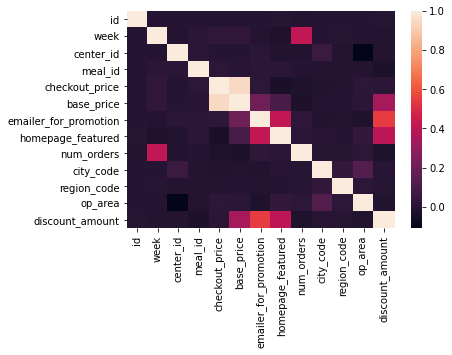

In [45]:
#correlation with heatmap
import seaborn as sns
sns.heatmap(total_data_df2.corr())

In [46]:
total_data_df2.head(4)

,id,week,center_id,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured,num_orders,category,cuisine,city_code,region_code,center_type,op_area,discount_amount
0,1379560,1,55,1885,136.83,152.29,0,0,177,Beverages,Thai,647,56,TYPE_C,2.0,15.46
2,1346989,1,55,2539,134.86,135.86,0,0,189,Beverages,Thai,647,56,TYPE_C,2.0,1.00
3,1338232,1,55,2139,339.50,437.53,0,0,54,Beverages,Indian,647,56,TYPE_C,2.0,98.03
5,1270037,1,55,1248,251.23,252.23,0,0,28,Beverages,Indian,647,56,TYPE_C,2.0,1.00


/Users/trimpu/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


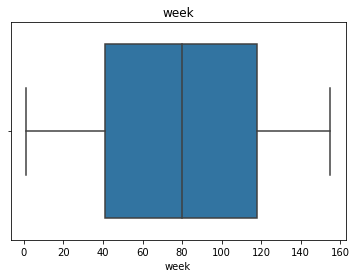

/Users/trimpu/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


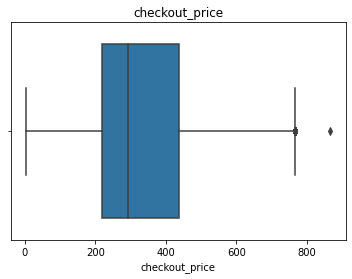

/Users/trimpu/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


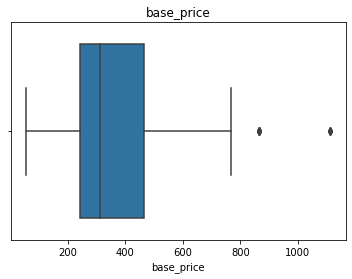

In [47]:
#numeric columns
numeric_data = total_data_df2[['week', 'checkout_price', 'base_price']]
for i in numeric_data.columns:
    sns.boxplot(numeric_data[i])
    plt.title(i)
    plt.show()

In [48]:
#difference b/w 75th percentile and 25th percentile. 
Q1 = numeric_data.quantile(0.25)
Q3 = numeric_data.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

week               77.00
checkout_price    219.22
base_price        223.10
dtype: float64


In [ ]:
#outlier detection.
print(numeric_data < (Q1 - 1.5 * IQR)) |(numeric_data > (Q3 + 1.5 * IQR))

<AxesSubplot:>

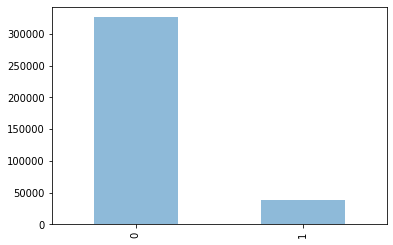

In [50]:
total_data_df2['emailer_for_promotion'].value_counts().plot(kind='bar', alpha=0.5)

<AxesSubplot:>

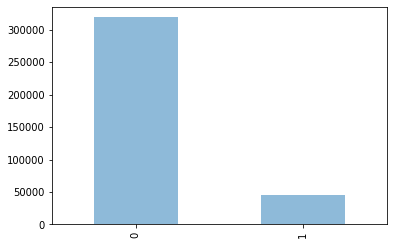

In [51]:
total_data_df2['homepage_featured'].value_counts().plot(kind='bar', alpha=0.5)

<AxesSubplot:>

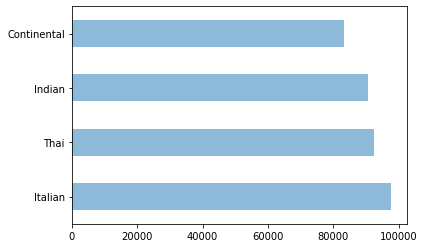

In [52]:
total_data_df2['cuisine'].value_counts().plot(kind='barh', alpha=0.5)

<AxesSubplot:>

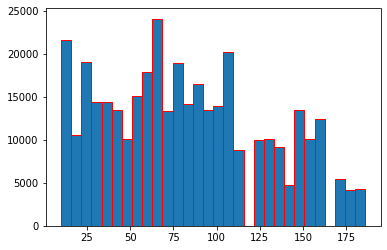

In [53]:
total_data_df2['center_id'].hist(bins=30, grid=False, edgecolor='red')

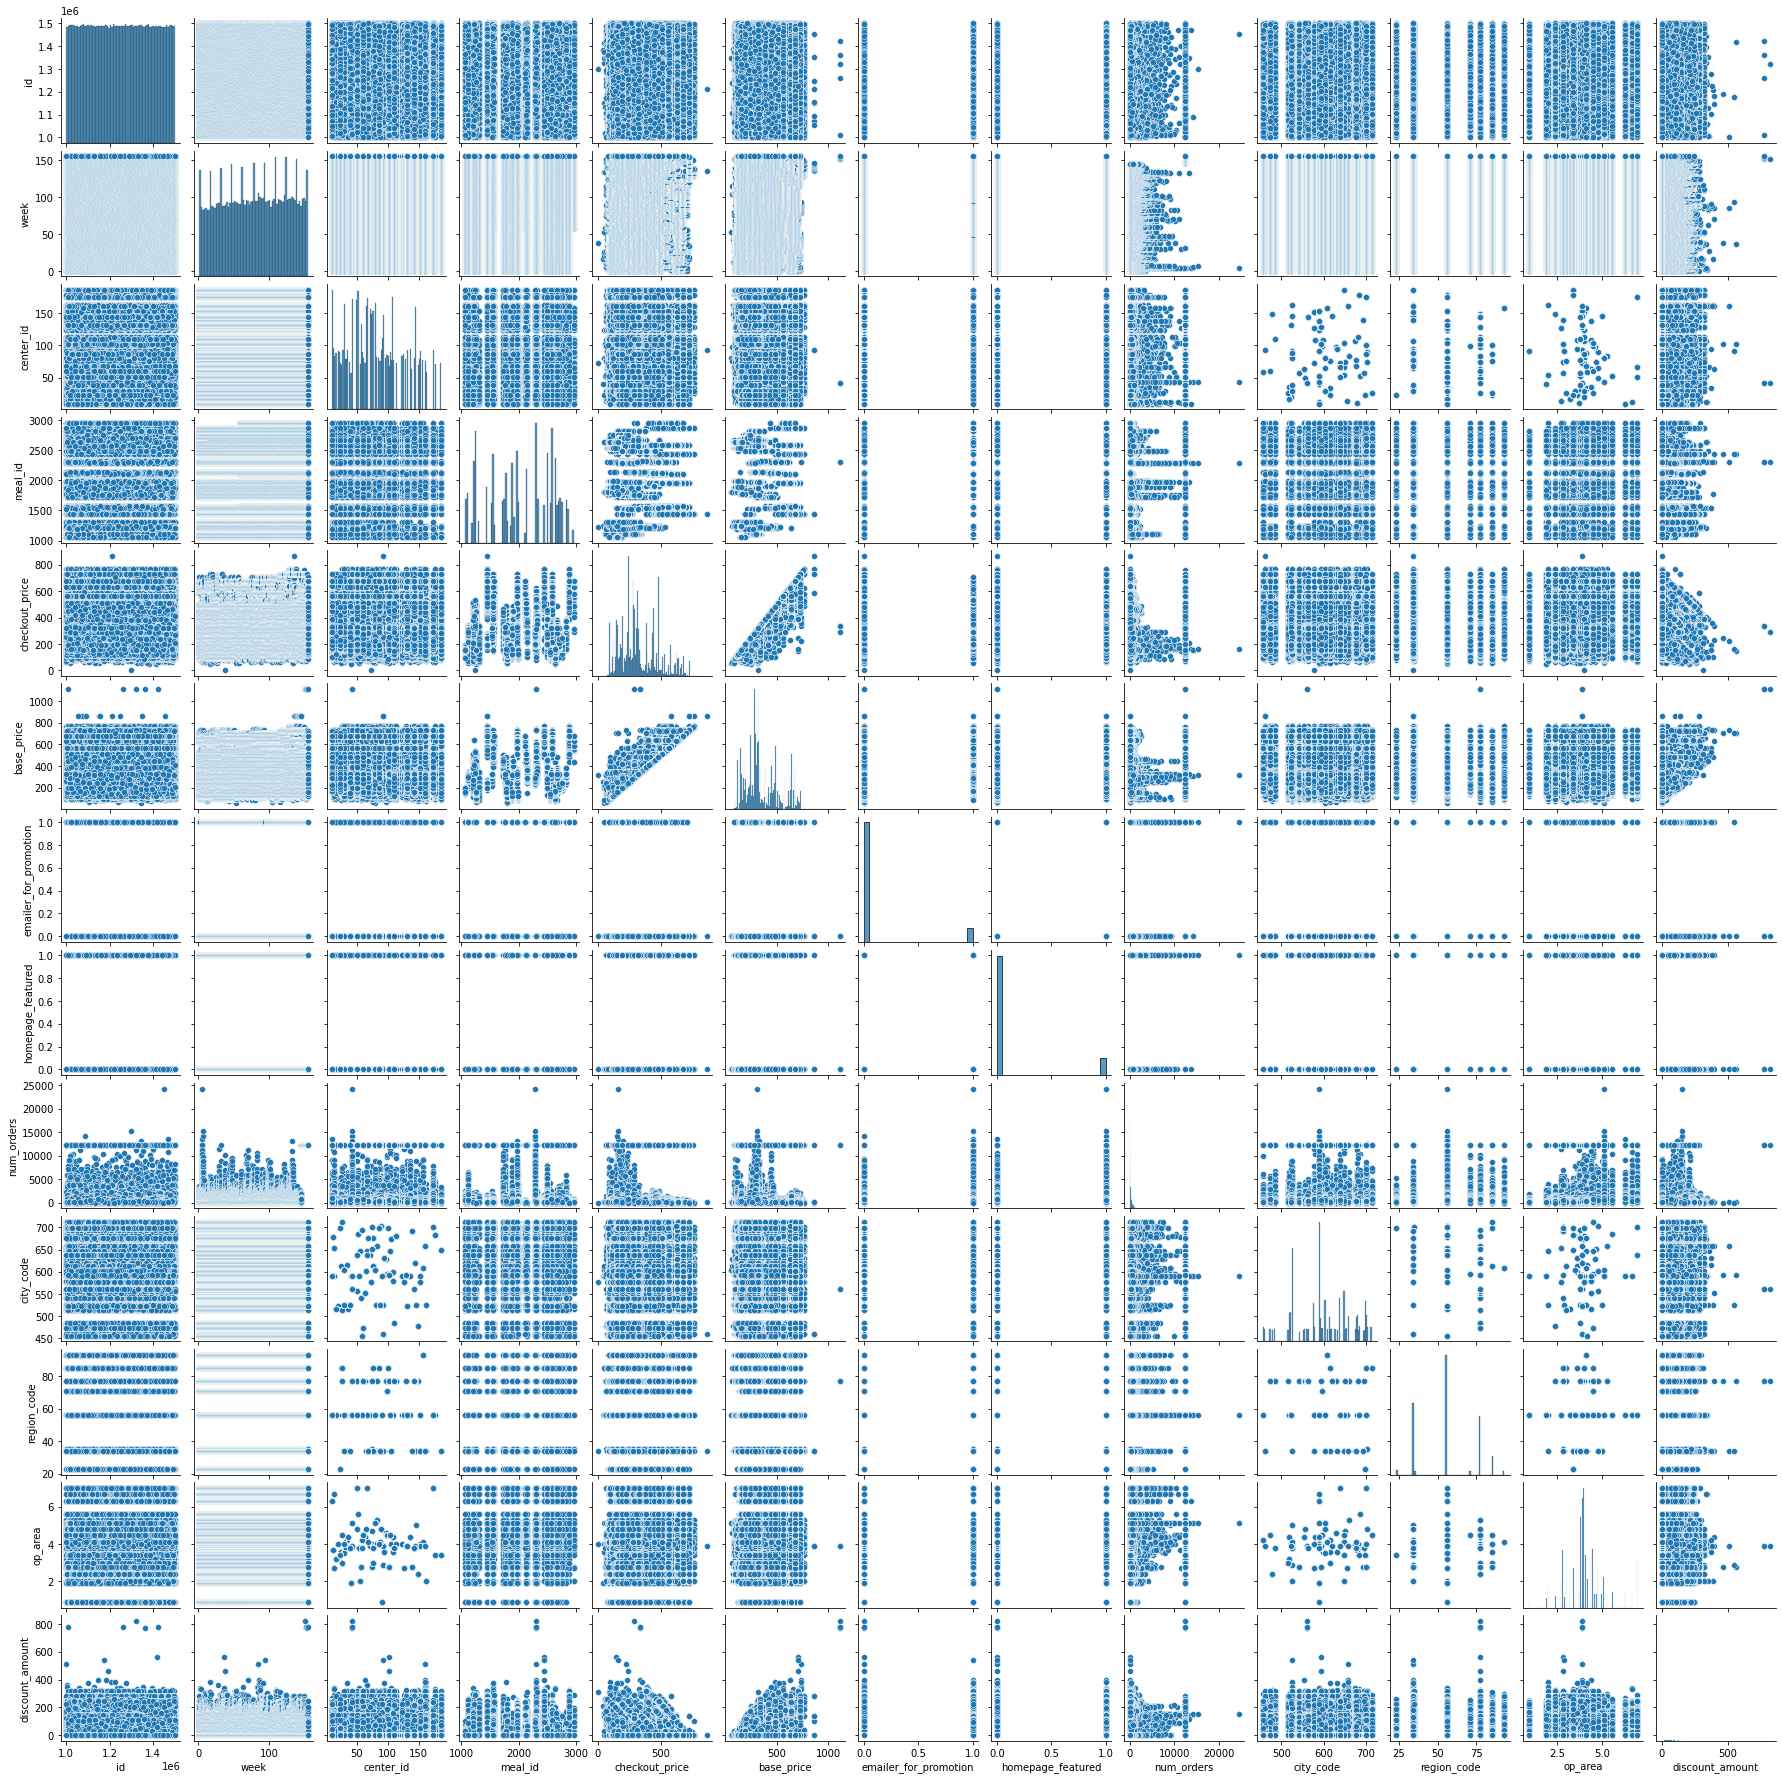

In [54]:
#Feature selection
g = sns.pairplot(total_data_df2)
g.fig.set_figwidth(25)
g.fig.set_figheight(25)

In [55]:
total_data_df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 364083 entries, 0 to 489120
Data columns (total 16 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   id                     364083 non-null  int64  
 1   week                   364083 non-null  int64  
 2   center_id              364083 non-null  int64  
 3   meal_id                364083 non-null  int64  
 4   checkout_price         364083 non-null  float64
 5   base_price             364083 non-null  float64
 6   emailer_for_promotion  364083 non-null  int64  
 7   homepage_featured      364083 non-null  int64  
 8   num_orders             364083 non-null  int64  
 9   category               364083 non-null  object 
 10  cuisine                364083 non-null  object 
 11  city_code              364083 non-null  int64  
 12  region_code            364083 non-null  int64  
 13  center_type            364083 non-null  object 
 14  op_area                364083 non-nu

In [56]:
#category, cuisine, center_type needs to be converted with encoding

In [57]:
checkout_price = total_data_df2.checkout_price
base_price = total_data_df2.base_price
discount_amount = total_data_df2.discount_amount
op_area = total_data_df2.op_area


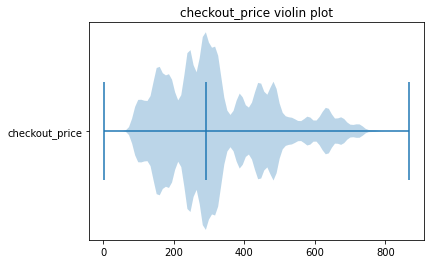

In [58]:
fig, ax = plt.subplots()
ax.violinplot(checkout_price, showmedians=True, vert=False)
ax.set_title('checkout_price violin plot')
ax.set_yticks([1])
ax.set_yticklabels(["checkout_price"])
ax.tick_params(axis='y')
plt.show()

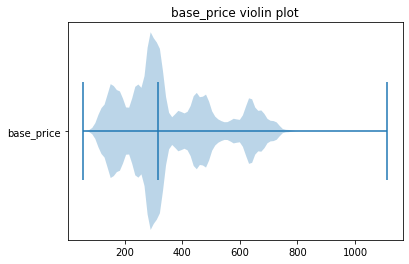

In [59]:
fig, ax = plt.subplots()
ax.violinplot(base_price, showmedians=True, vert=False)
ax.set_title('base_price violin plot')
ax.set_yticks([1])
ax.set_yticklabels(["base_price"])
ax.tick_params(axis='y')
plt.show()

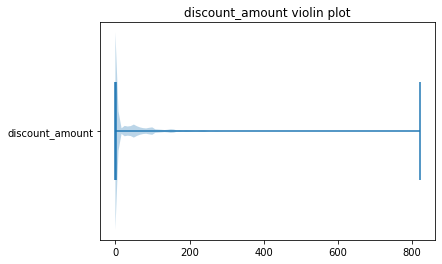

In [60]:
fig, ax = plt.subplots()
ax.violinplot(discount_amount, showmedians=True, vert=False)
ax.set_title('discount_amount violin plot')
ax.set_yticks([1])
ax.set_yticklabels(["discount_amount"])
ax.tick_params(axis='y')
plt.show()

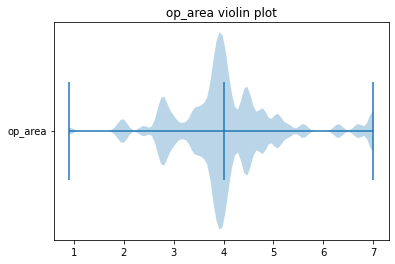

In [61]:
fig, ax = plt.subplots()
ax.violinplot(op_area, showmedians=True, vert=False)
ax.set_title('op_area violin plot')
ax.set_yticks([1])
ax.set_yticklabels(["op_area"])
ax.tick_params(axis='y')
plt.show()

<AxesSubplot:xlabel='week', ylabel='num_orders'>

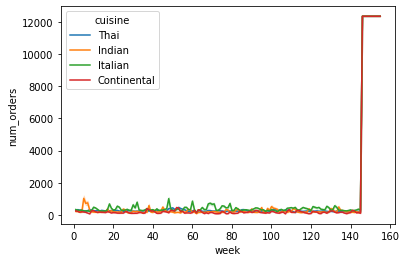

In [62]:
sns.lineplot(x="week", y="num_orders", data=total_data_df2, hue="cuisine")

<AxesSubplot:xlabel='week', ylabel='num_orders'>

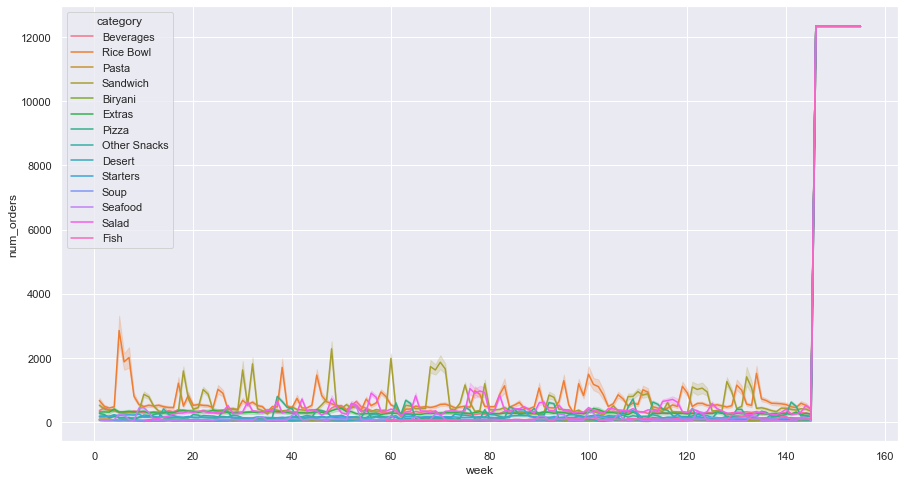

In [63]:
sns.set(rc={'figure.figsize':(15, 8)})
sns.lineplot(x="week", y="num_orders", data=total_data_df2, hue="category")

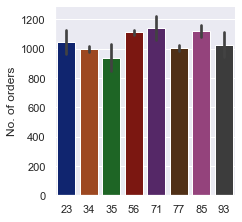

In [64]:
g = sns.catplot(
    data=total_data_df2, kind="bar",
    x="region_code", y="num_orders",
     palette="dark"
)
g.fig.set_figwidth(3)
g.fig.set_figheight(3)
g.set_axis_labels("", "No. of orders")

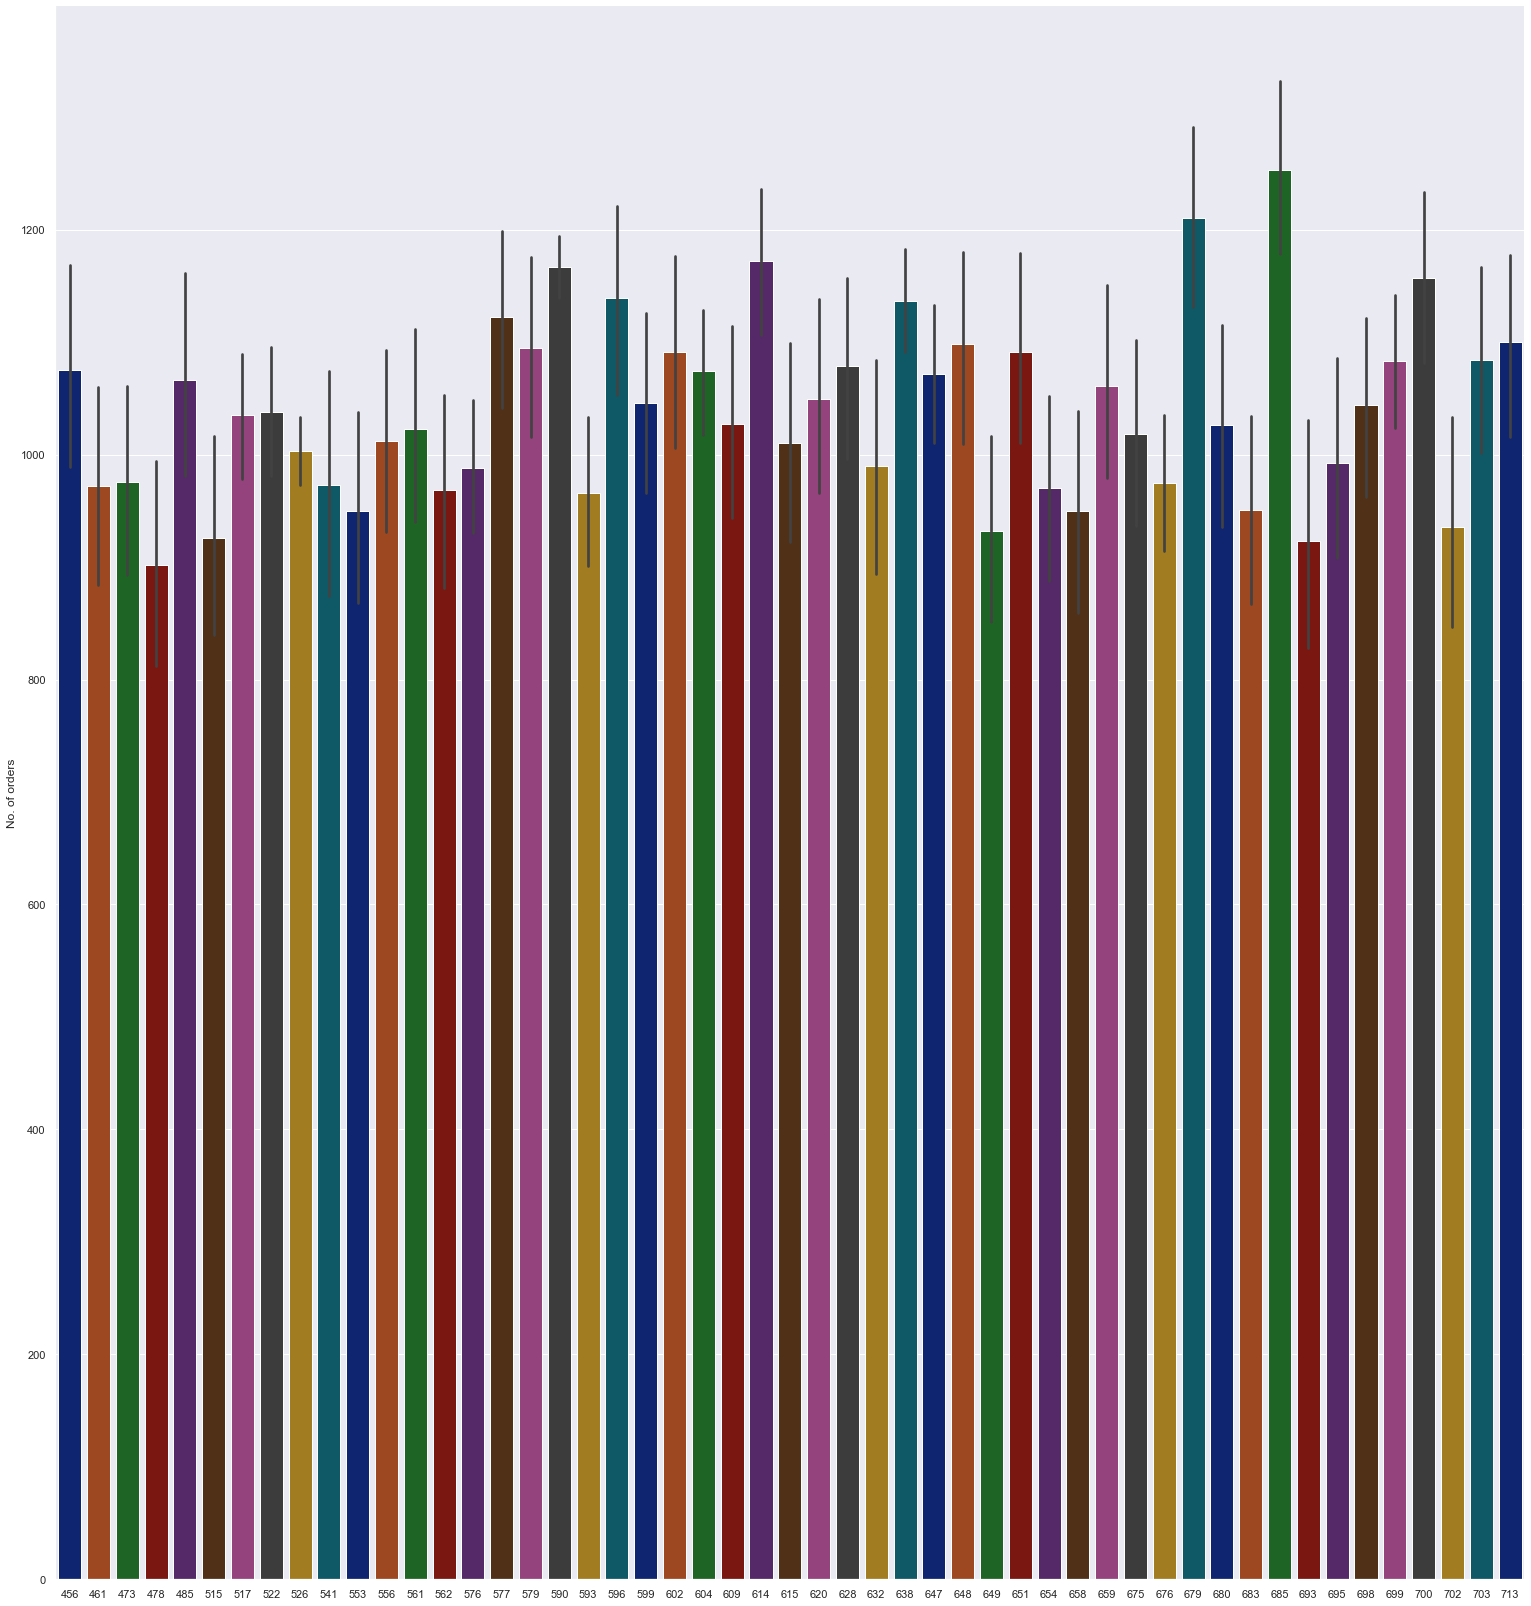

In [65]:
g = sns.catplot(
    data=total_data_df2, kind="bar",
    x="city_code", y="num_orders",
     palette="dark"
)
g.fig.set_figwidth(25)
g.fig.set_figheight(25)
g.set_axis_labels("", "No. of orders")

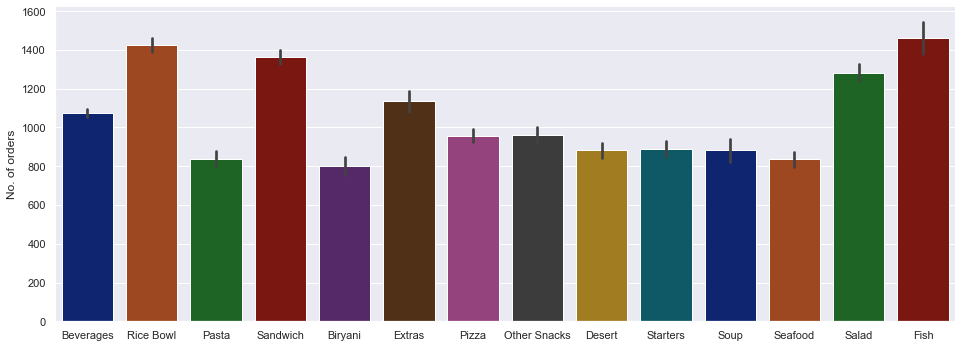

In [66]:
g = sns.catplot(
    data=total_data_df2, kind="bar",
    x="category", y="num_orders",
     palette="dark"
)
g.fig.set_figwidth(15)
g.fig.set_figheight(5)
g.set_axis_labels("", "No. of orders")

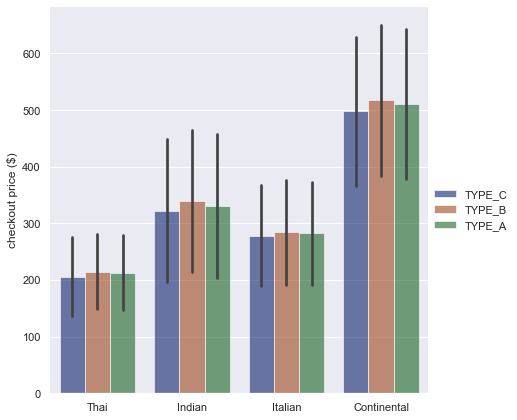

In [67]:
g = sns.catplot(
    data=total_data_df2, kind="bar",
    x="cuisine", y="checkout_price", hue="center_type",
    ci="sd", palette="dark", alpha=.6, height=6
)
g.despine(left=True)
g.set_axis_labels("", "checkout price ($)")
g.legend.set_title("")

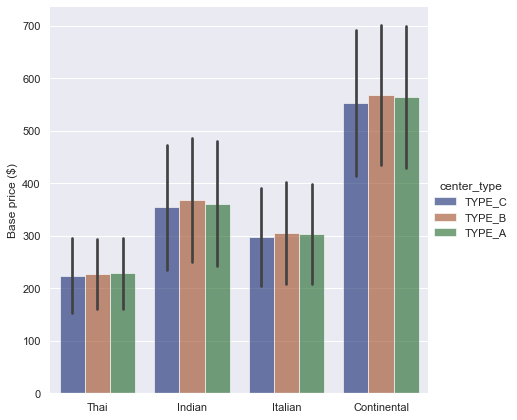

In [68]:
g = sns.catplot(
    data=total_data_df2, kind="bar",
    x="cuisine", y="base_price", hue="center_type",
    ci="sd", palette="dark", alpha=.6, height=6
)
g.despine(left=True)
g.set_axis_labels("", "Base price ($)")

In [69]:
total_data_df2

,id,week,center_id,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured,num_orders,category,cuisine,city_code,region_code,center_type,op_area,discount_amount
0,1379560,1,55,1885,136.83,152.29,0,0,177,Beverages,Thai,647,56,TYPE_C,2.0,15.46
2,1346989,1,55,2539,134.86,135.86,0,0,189,Beverages,Thai,647,56,TYPE_C,2.0,1.00
3,1338232,1,55,2139,339.50,437.53,0,0,54,Beverages,Indian,647,56,TYPE_C,2.0,98.03
5,1270037,1,55,1248,251.23,252.23,0,0,28,Beverages,Indian,647,56,TYPE_C,2.0,1.00
6,1191377,1,55,1778,183.36,184.36,0,0,190,Beverages,Italian,647,56,TYPE_C,2.0,1.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
489116,1250239,155,61,1543,482.09,484.09,0,0,12345,Desert,Indian,473,77,TYPE_A,4.5,2.00
489117,1039516,155,61,2304,483.09,483.09,0,0,12345,Desert,Indian,473,77,TYPE_A,4.5,0.00
489118,1158107,155,61,2664,322.07,323.07,0,0,12345,Salad,Italian,473,77,TYPE_A,4.5,1.00
489119,1444235,155,61,2569,322.07,323.07,0,0,12345,Salad,Italian,473,77,TYPE_A,4.5,1.00


In [70]:
#category, cuisine, center_type
from sklearn.preprocessing import LabelEncoder
lb1 = LabelEncoder()
total_data_df2['center_type'] = lb1.fit_transform(total_data_df2['center_type'])

lb2 = LabelEncoder()
total_data_df2['cuisine'] = lb2.fit_transform(total_data_df2['cuisine'])

lb3 = LabelEncoder()
total_data_df2['category'] = lb3.fit_transform(total_data_df2['category'])

<ipython-input-70-95725892049d>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  total_data_df2['center_type'] = lb1.fit_transform(total_data_df2['center_type'])
<ipython-input-70-95725892049d>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  total_data_df2['cuisine'] = lb2.fit_transform(total_data_df2['cuisine'])
<ipython-input-70-95725892049d>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the cav

In [71]:
total_data_df2

,id,week,center_id,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured,num_orders,category,cuisine,city_code,region_code,center_type,op_area,discount_amount
0,1379560,1,55,1885,136.83,152.29,0,0,177,0,3,647,56,2,2.0,15.46
2,1346989,1,55,2539,134.86,135.86,0,0,189,0,3,647,56,2,2.0,1.00
3,1338232,1,55,2139,339.50,437.53,0,0,54,0,1,647,56,2,2.0,98.03
5,1270037,1,55,1248,251.23,252.23,0,0,28,0,1,647,56,2,2.0,1.00
6,1191377,1,55,1778,183.36,184.36,0,0,190,0,2,647,56,2,2.0,1.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
489116,1250239,155,61,1543,482.09,484.09,0,0,12345,2,1,473,77,0,4.5,2.00
489117,1039516,155,61,2304,483.09,483.09,0,0,12345,2,1,473,77,0,4.5,0.00
489118,1158107,155,61,2664,322.07,323.07,0,0,12345,9,2,473,77,0,4.5,1.00
489119,1444235,155,61,2569,322.07,323.07,0,0,12345,9,2,473,77,0,4.5,1.00


In [ ]:
#min=10,max=186
#total_data_df2['center_id'].max()